<a href="https://colab.research.google.com/github/thelionthelion/eth_ntifi/blob/main/NTIFI_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Technologies in Banking and Finance
* ETH Zurich
* Machine Learning Coding Exercises

## Task 1


Choose numbers J, K ≥ 5000 and simulate J + K vectors xj = (xj1, xj2, xj3) ∈ R3 with
* xj1 = age in [18, 80]
* xj2 = monthly income in CHF 1000 in [1, 15]
* xj3 = salaried/self-employed in {0, 1}

Compute the empirical means of xj1, xj2 and xj3 over j = 1,...,J.
Give two additional features which you believe are relevant for credit risk assessment in reality.

Explain your answer.

In [2]:
#%tensorflow_version 1.x
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Concatenate, Dropout, Subtract, \
                        Flatten, MaxPooling2D, Multiply, Lambda, Add, Dot
from keras.backend import constant
from keras import optimizers

#from keras.engine.topology import Layer
from keras.models import Model
from keras.layers import Input
from keras import initializers
from keras.constraints import max_norm
import keras.backend as K
import matplotlib.pyplot as plt
import copy

1a) Choose numbers J, K ≥ 5000 and simulate J + K vectors xj = (xj1, xj2, xj3) ∈ R3 with
* xj1 = age in [18, 80]
* xj2 = monthly income in CHF 1000 in [1, 15]
* xj3 = salaried/self-employed in {0, 1}

In [37]:
J = 10000
K = 5000
JK = J + K

import numpy as np

rng = np.random.Generator(np.random.PCG64())
rng = np.random.default_rng(seed=1987)
# uniform from 0 to 1 value = rng.random()
# generate 10 Gaussian random number value = rng.standard_normal(10)

# generate 20 random integers between 0 and 10
ages = rng.integers(low=18, high=80, size=JK)
incomes = rng.integers(low=1, high=15, size=JK)
salaried = rng.binomial(n=1, p= 0.5, size=JK)
print(ages)
print(incomes)
print(salaried)

[38 34 63 ... 20 48 54]
[ 6 13 14 ...  8  9  9]
[0 0 1 ... 1 1 0]


Compute the empirical means of xj1, xj2 and xj3 over j = 1,...,J.

In [43]:
agesMean = np.mean(ages[0:J-1])
incomesMean = np.mean(incomes[0:J-1])
salariedMean = np.mean(salaried[0:J-1])
print(agesMean)
print(incomesMean)
print(salariedMean)


48.26422642264227
7.463146314631463
0.5070507050705071


Give two additional features which you believe are relevant for credit risk assessment in reality. Explain your answer.

* Number of defaulted loans in the past: If a default happend before, it might be more likely to happen again
* Collateral available. If there is additional securities this might not decrease the risk itself of default, but it is relevant for the overall risk assessment as the bank might be able to recover some assets in case of default.

## Task 2

Let ξj , j = 1, . . . , J + K be independent random variables that are uniformly distributed on (0, 1)

[0.34989873 0.61632888 0.97633625 ... 0.78875966 0.06554049 0.2059283 ]


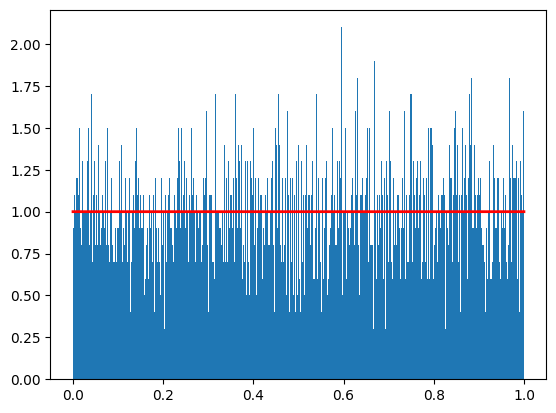

In [46]:
xi = rng.uniform(low=0, high=1, size=JK)
print(xi)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(xi, 1500, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

σ : R → (0, 1) the logistic (or sigmoid) function given by
σ(z)= e^z / (1+e^z) = 1+e−z.

In [47]:
def sigmoid(z):
    return 1 / (1+exp(-z))

Consider a function p : R3 → (0, 1) of the form
p(x) = σ  a0 + a1|x1 − 50| + a2(x2)1.25 + a3x3

In [48]:
def p(x,a0,a1,a2,a3):
    return sigmoid(a0 + a1 * abs(x[0] - 50) + a2 * pow(x[1],1.25) + a3 * x[2])